## Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skpre 
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


## Reading csv


In [2]:
df_titanic = pd.read_csv("../input/titanic/train.csv")

## Removing Null Values


Finding which features have null values


In [3]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finding stats of dataset before manipulation 

In [4]:
df_titanic.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_titanic.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the cabin feature as it has a lot of null values

In [7]:
df_titanic = df_titanic.drop(columns = ['Cabin'])

In [8]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Checking null values after cabin feature is dropped

In [9]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Dropping rows that have null values. Not dropping another feature to avoid underfitting

In [10]:
df_titanic = df_titanic.dropna(axis = 0, how = 'any').copy()

In [11]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Finally, there are no null values

In [12]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Adding features

In [13]:
df_titanic['is_male'] = df_titanic['Sex'] == 'male'
df_titanic['is_female'] = df_titanic['Sex'] == 'female'
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male,is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,False,True
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,False


Creating a new feature (Sex-Class) for visualization. Example: a male who is travelling in first class = male1

In [14]:
df_titanic['Sex-Class'] = df_titanic['Sex'] + df_titanic['Pclass'].astype(str) 
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male,is_female,Sex-Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,male3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,True,female1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True,female3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,True,female1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,male3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,False,True,female3
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,False,male2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,True,female1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,False,male1


In [15]:
df_titanic.mean()

PassengerId    448.589888
Survived         0.404494
Pclass           2.240169
Age             29.642093
SibSp            0.514045
Parch            0.432584
Fare            34.567251
is_male          0.636236
is_female        0.363764
dtype: float64

## Finding Statistical Values

Finding out how many people where in each Pclass

In [16]:
people_in_firstclass = (df_titanic['Pclass'] == 1).sum()
people_in_firstclass

184

In [17]:
people_in_secondclass = (df_titanic['Pclass'] == 2).sum()
people_in_secondclass

173

In [18]:
people_in_thirdclass = (df_titanic['Pclass'] == 3).sum()
people_in_thirdclass

355

Finding out the percent of males and females who survived

In [19]:
females_survived = ((df_titanic['is_female']) & (df_titanic['Survived'])).sum()
females_total = (df_titanic['is_female']).sum()
females_survive_percent = (females_survived / females_total) * 100
females_survive_percent

75.2895752895753

In [20]:
males_survived = ((df_titanic['is_male']) & (df_titanic['Survived'])).sum()
males_total = (df_titanic['is_male']).sum()
males_survive_percent = (males_survived / males_total) * 100
males_survive_percent

20.52980132450331

Finding out the percent of how many people in each Sex-Class survived


In [21]:
female1_survive = ((df_titanic['Sex-Class'] == 'female1') & (df_titanic['Survived'])).sum()
female1_total = (df_titanic['Sex-Class'] == 'female1').sum()
female1_survive_percent = (female1_survive / female1_total) * 100
female1_survive_percent # 96% of the females in first class survived

96.3855421686747

In [22]:
female2_survive = ((df_titanic['Sex-Class'] == 'female2') & (df_titanic['Survived'])).sum()
female2_total = (df_titanic['Sex-Class'] == 'female2').sum()
female2_survive_percent = (female2_survive / female2_total) * 100
female2_survive_percent

91.8918918918919

In [23]:
female3_survive = ((df_titanic['Sex-Class'] == 'female3') & (df_titanic['Survived'])).sum()
female3_total = (df_titanic['Sex-Class'] == 'female3').sum()
female3_survive_percent = (female3_survive / female3_total) * 100
female3_survive_percent

46.07843137254902

In [24]:
male1_survive = ((df_titanic['Sex-Class'] == 'male1') & (df_titanic['Survived'])).sum()
male1_total = (df_titanic['Sex-Class'] == 'male1').sum()
male1_survive_percent = (male1_survive / male1_total) * 100
male1_survive_percent

39.603960396039604

In [25]:
male2_survive = ((df_titanic['Sex-Class'] == 'male2') & (df_titanic['Survived'])).sum()
male2_total = (df_titanic['Sex-Class'] == 'male2').sum()
male2_survive_percent = (male2_survive / male2_total) * 100
male2_survive_percent

15.151515151515152

In [26]:
male3_survive = ((df_titanic['Sex-Class'] == 'male3') & (df_titanic['Survived'])).sum()
male3_total = (df_titanic['Sex-Class'] == 'male3').sum()
male3_survive_percent = (male3_survive / male3_total) * 100
male3_survive_percent

15.019762845849801

## Visualization

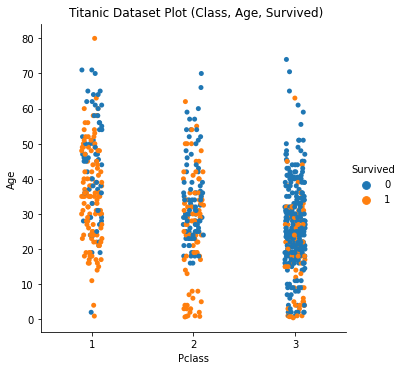

In [27]:
sns.catplot(data = df_titanic, x = 'Pclass', y = 'Age', hue = 'Survived')
fig = plt.gcf()
fig.suptitle('Titanic Dataset Plot (Class, Age, Survived)', y = 1.02)
fig.show()

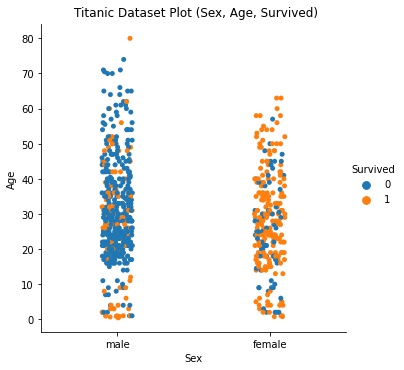

In [28]:
sns.catplot(data = df_titanic, x = 'Sex', y = 'Age', hue = 'Survived')
fig = plt.gcf()
fig.suptitle('Titanic Dataset Plot (Sex, Age, Survived)', y = 1.02)
fig.show()

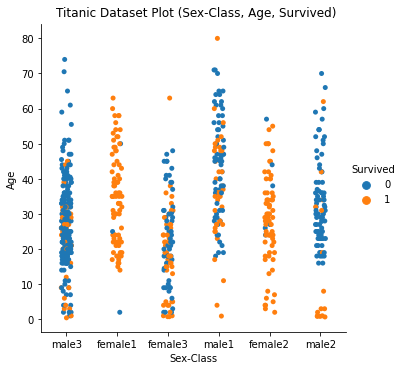

In [29]:
sns.catplot(data = df_titanic, x = 'Sex-Class', y = 'Age', hue = 'Survived')
fig = plt.gcf()
fig.suptitle('Titanic Dataset Plot (Sex-Class, Age, Survived)', y = 1.02)
fig.show()

## Fixing Data for ML Models

Dropping columns which will are not going to be used in visualization or model. **df_titanic2** will be used for building models.


In [30]:
df_titanic2 = df_titanic.copy()
df_titanic2 = df_titanic.drop(columns  = ['Name', 'Ticket', 'Sex-Class', 'is_male', 'is_female'])
df_titanic2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [31]:
df_titanic2['Sex'] = df_titanic2['Sex'].map({'male':1,'female':0})

In [32]:
df_titanic2['Embarked'] = df_titanic2['Embarked'].map({'S':0,'C':1, 'Q':2})

In [33]:
df_titanic2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,2
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
889,890,1,1,1,26.0,0,0,30.0000,1


Removing Survived feature

In [34]:
true_survival = df_titanic2['Survived']
df_titanic2 = df_titanic2.drop(columns = ['Survived'])

In [35]:
df_titanic2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,886,3,0,39.0,0,5,29.1250,2
886,887,2,1,27.0,0,0,13.0000,0
887,888,1,0,19.0,0,0,30.0000,0
889,890,1,1,26.0,0,0,30.0000,1


## Finding X_train, X_test, y_train, y_test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_titanic2, true_survival, test_size = 0.20)

## Random Forest Classifier


In [37]:
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth=1, random_state=5)
rf_precision_scores = cross_val_score(rf_classifier, df_titanic2, true_survival, scoring = 'precision', cv=5)
rf_precision_scores.mean()

0.8969344899222949

In [38]:
rf_recall_scores = cross_val_score(rf_classifier, df_titanic2, true_survival, scoring = 'recall', cv=5)
rf_recall_scores.mean()

0.47586206896551725

## Random Forest Classifier with Hyperparameter Optimization


In [39]:
rf_classifier2 = RandomForestClassifier()
param_space = { 'n_estimators' : [3,10,30,50,100], 
               'max_depth' : [5,10,50,100], 
               'min_samples_split' : [2,10,50], 
               'min_samples_leaf' : [1, 10, 100], 
               'max_features' : [2,4,6,8] }

rf_classifier2_cv = RandomizedSearchCV(rf_classifier2, param_space, n_iter=10, scoring = 'neg_root_mean_squared_error', cv = 5 )
search = rf_classifier2_cv.fit(X_train, y_train)

In [40]:
search.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 8,
 'max_depth': 5}

In [41]:
rf_classifier2 = RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=30)
rf_classifier2.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features=2, min_samples_split=10,
                       n_estimators=30)

In [42]:
rf2_predictions = rf_classifier2.predict(X_test)

In [43]:
mean_squared_error(y_test, rf2_predictions)

0.20279720279720279

In [44]:
rf2_precision_scores = cross_val_score(rf_classifier2, df_titanic2, true_survival, scoring = 'precision', cv=5)
rf2_precision_scores.mean()

0.83292220113852

In [45]:
rf2_recall_scores = cross_val_score(rf_classifier2, df_titanic2, true_survival, scoring = 'recall', cv=5)
rf2_recall_scores.mean()

0.5768905021173624

In [46]:
accuracy_score(y_test, rf2_predictions)

0.7972027972027972

In [47]:
f1score_rf2  = 2 * (( rf2_precision_scores.mean() * rf2_recall_scores.mean()) / (rf2_precision_scores.mean() + rf2_recall_scores.mean()))
# 2*((precision*recall)/(precision+recall))
f1score_rf2

0.681657791463789

## Logistic Regression

In [48]:
logistic_regression_model = linear_model.LogisticRegression(max_iter=800)

In [49]:
logistic_regression_model.fit(X = X_train, y = y_train)

LogisticRegression(max_iter=800)

In [50]:
predictions = logistic_regression_model.predict(X = X_test)

In [51]:
mean_absolute_error(y_test, predictions)

0.2097902097902098

In [52]:
logistic_regression_model.coef_

array([[ 3.60179190e-04, -1.17532135e+00, -2.58448152e+00,
        -4.28045288e-02, -3.80283497e-01, -9.42196037e-02,
         1.71990276e-03,  1.40318715e-01]])

We can see the second and third coefficients are the largest. Therefore, they make the biggest impact. The second coefficient represents **Pclass** (the class the person was travelling in, e.g. first, second, or third). The third coefficient represents **Sex**, which is the person's gender.

In [53]:
lr_precision_scores = cross_val_score(logistic_regression_model, df_titanic2, true_survival, scoring = 'precision', cv=5)
lr_precision_scores.mean()

0.7470897551086231

In [54]:
lr_recall_scores = cross_val_score(logistic_regression_model, df_titanic2, true_survival, scoring = 'recall', cv=5)
lr_recall_scores.mean()

0.7010889292196008

In [55]:
accuracy_score(y_test, predictions)

0.7902097902097902

In [56]:
f1score_lr  = 2 * (( lr_precision_scores.mean() * lr_recall_scores.mean()) / (lr_precision_scores.mean() + lr_recall_scores.mean()))
f1score_lr

0.7233587431001387

In [57]:
cf_matrix = confusion_matrix(y_test, predictions)

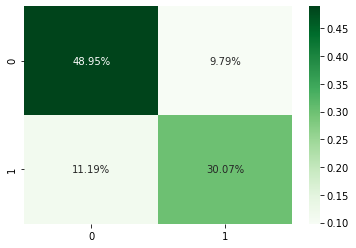

In [58]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')

## Decision Tree Classifier


In [59]:
tree_model = tree.DecisionTreeClassifier()

In [60]:
tree_model.fit(X_train, y_train)
predictions_tree = tree_model.predict(X_test)
predictions_tree

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [61]:
mean_absolute_error(y_test, predictions_tree)

0.32167832167832167

In [62]:
tm_precision_scores = cross_val_score(tree_model, df_titanic2, true_survival, scoring = 'precision', cv=5)
tm_precision_scores.mean()

0.6455956524628114

In [63]:
tm_recall_scores = cross_val_score(tree_model, df_titanic2, true_survival, scoring = 'recall', cv=5)
tm_recall_scores.mean()

0.5803992740471868

In [64]:
accuracy_score(y_test, predictions_tree)

0.6783216783216783

In [65]:
f1score_tm  = 2 * (( tm_precision_scores.mean() * tm_recall_scores.mean()) / (tm_precision_scores.mean() + tm_recall_scores.mean()))
f1score_tm

0.6112639455761727

In [66]:
cf_matrix2 = confusion_matrix(y_test, predictions_tree)

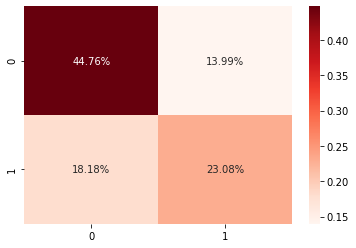

In [67]:
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, fmt='.2%', cmap='Reds')